In [27]:
from sklearn import datasets
import numpy as np
dataset = datasets.load_iris()
data = dataset['data']
iris_type = dataset['target']
print(type(data),data.shape)
print(iris_type)

<class 'numpy.ndarray'> (150, 4)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [39]:
import torch 
import torch.nn as nn
import torch.nn.functional as F

x=torch.FloatTensor(data)
y=torch.LongTensor(iris_type)


In [40]:
# 定义BP神经网络
class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden)
        #self.hidden2 = torch.nn.Linear(n_hidden, n_hidden)
        self.out = torch.nn.Linear(n_hidden, n_output)     #实际包含两个隐含层
        
    def forward(self,x):
        x = F.relu(self.hidden(x))
        #x = F.relu(self.hidden2(x))
        x = self.out(x)
        return x
    
net_test=Net(4,7,3)
print(net_test)

Net(
  (hidden): Linear(in_features=4, out_features=7, bias=True)
  (out): Linear(in_features=7, out_features=3, bias=True)
)


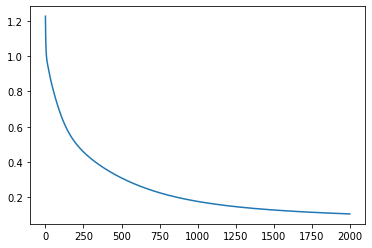

In [95]:

import matplotlib.pyplot as plt
net = Net(n_feature=4, n_hidden=20, n_output=3)
optimizer = torch.optim.SGD(net.parameters(), lr=0.01) # SGD:随机梯度下降法

loss_pic=[]
for i in range(2000):
    out = net(x)
    criteria=nn.CrossEntropyLoss()
    loss = criteria(out,y) # 输出与原始标签y对比
    optimizer.zero_grad()  # 初始化梯度
    loss.backward()
    optimizer.step()
    loss_pic.append(loss.data.numpy())
    #print(loss.data.numpy())
loss_pic=np.array(loss_pic)
#print(loss_pic)
plt.plot(loss_pic)
#plt.savefig('loss.jpg')
plt.show()

In [96]:

out = net(x)
# out是一个计算矩阵
prediction = torch.max(out, 1)[1]
pred_y = prediction.numpy()
# 预测y输出数列
target_y = y.data.numpy()
# 实际y输出数据
print((pred_y==target_y).sum()/len(y))

0.98


In [ ]:
#参照上面自己试着搭一个网络，学习一下
class ownnet(torch.nn.Module):
    def __init__(self):
        super(ownnet,self).__init__()
        self.conv1=nn.Conv2d(3,10,5)
        self.conv2=nn.Conv2d(5,20,5)
        self.fc=nn.Linear(32,64)
        
    def forward(self,x):
        x=F.relu(self.conv1(x))
        x=F.relu(self.conv2(x))
        x=self.fc(x)
        return x
    
nnn=ownnet()
print(nnn)

In [ ]:
from torchvision import models

model=models.resnet50(pretrained=True)
print(model)

In [ ]:
# 另一种方式，直接写在类里
import torch
import torch.nn as nn

# 定义数据
# x:输入数据
# y:标签
x = torch.Tensor([[0.2, 0.4], [0.2, 0.3], [0.3, 0.4]])
y = torch.Tensor([[0.6], [0.5], [0.7]])


class MyNet(nn.Module):
    def __init__(self):
        # 调用基类构造函数
        super(MyNet, self).__init__()
        # 容器，使用时顺序调用各个层
        self.fc = nn.Sequential(
            # 定义三层
            # 输入层
            nn.Linear(2, 4),
            # 激活函数
            nn.Sigmoid(),
            # 隐藏层
            nn.Linear(4, 4),
            nn.Sigmoid(),
            # 输出层
            nn.Linear(4, 1),
        )
        # 优化器
        # params:优化对象
        # lr:学习率
        self.opt = torch.optim.Adam(params=self.parameters(), lr=0.001)
        # 损失函数,均方差
        self.mls = torch.nn.MSELoss()

    def forward(self, inputs):
        # 前向传播
        return self.fc(inputs)

    def train(self, x, y):
        # 训练
        # 得到输出结果
        out = self.forward(x)
        # 计算误差
        loss = self.mls(out, y)
        # print('loss', loss)
        # 梯度置零
        self.opt.zero_grad()
        # 误差反向传播
        loss.backward()
        # 更新权重
        self.opt.step()

    def test(self, x):
        # 测试，就是前向传播的过程
        return self.forward(x)


net = MyNet()
for i in range(10000):
    net.train(x, y)
x = torch.Tensor([[0.4, 0.1]])
out = net.test(x)
print(out)  # 输出结果 tensor([[0.5205]], grad_fn=<AddmmBackward>)